# imports

In [1]:
from SEAM.utils import *
import SEAM
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
Using TensorFlow backend.


# settings

In [2]:
sns.set_style('white')
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 2}

# matplotlib.rc('font', **font)
# matplotlib.rcParams.update({'font.size': 2})

import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# load

### load raw and segmented data from data/process/

In [12]:
a = sc.read_h5ad('/home/yzy/projects/SEAM/SEAM_old/data/h5ad/mouse/liver/data.h5ad')
a_raw = sc.read_h5ad('/home/yzy/projects/SEAM/SEAM_old/data/raw/mouse_liver_raw.h5ad')

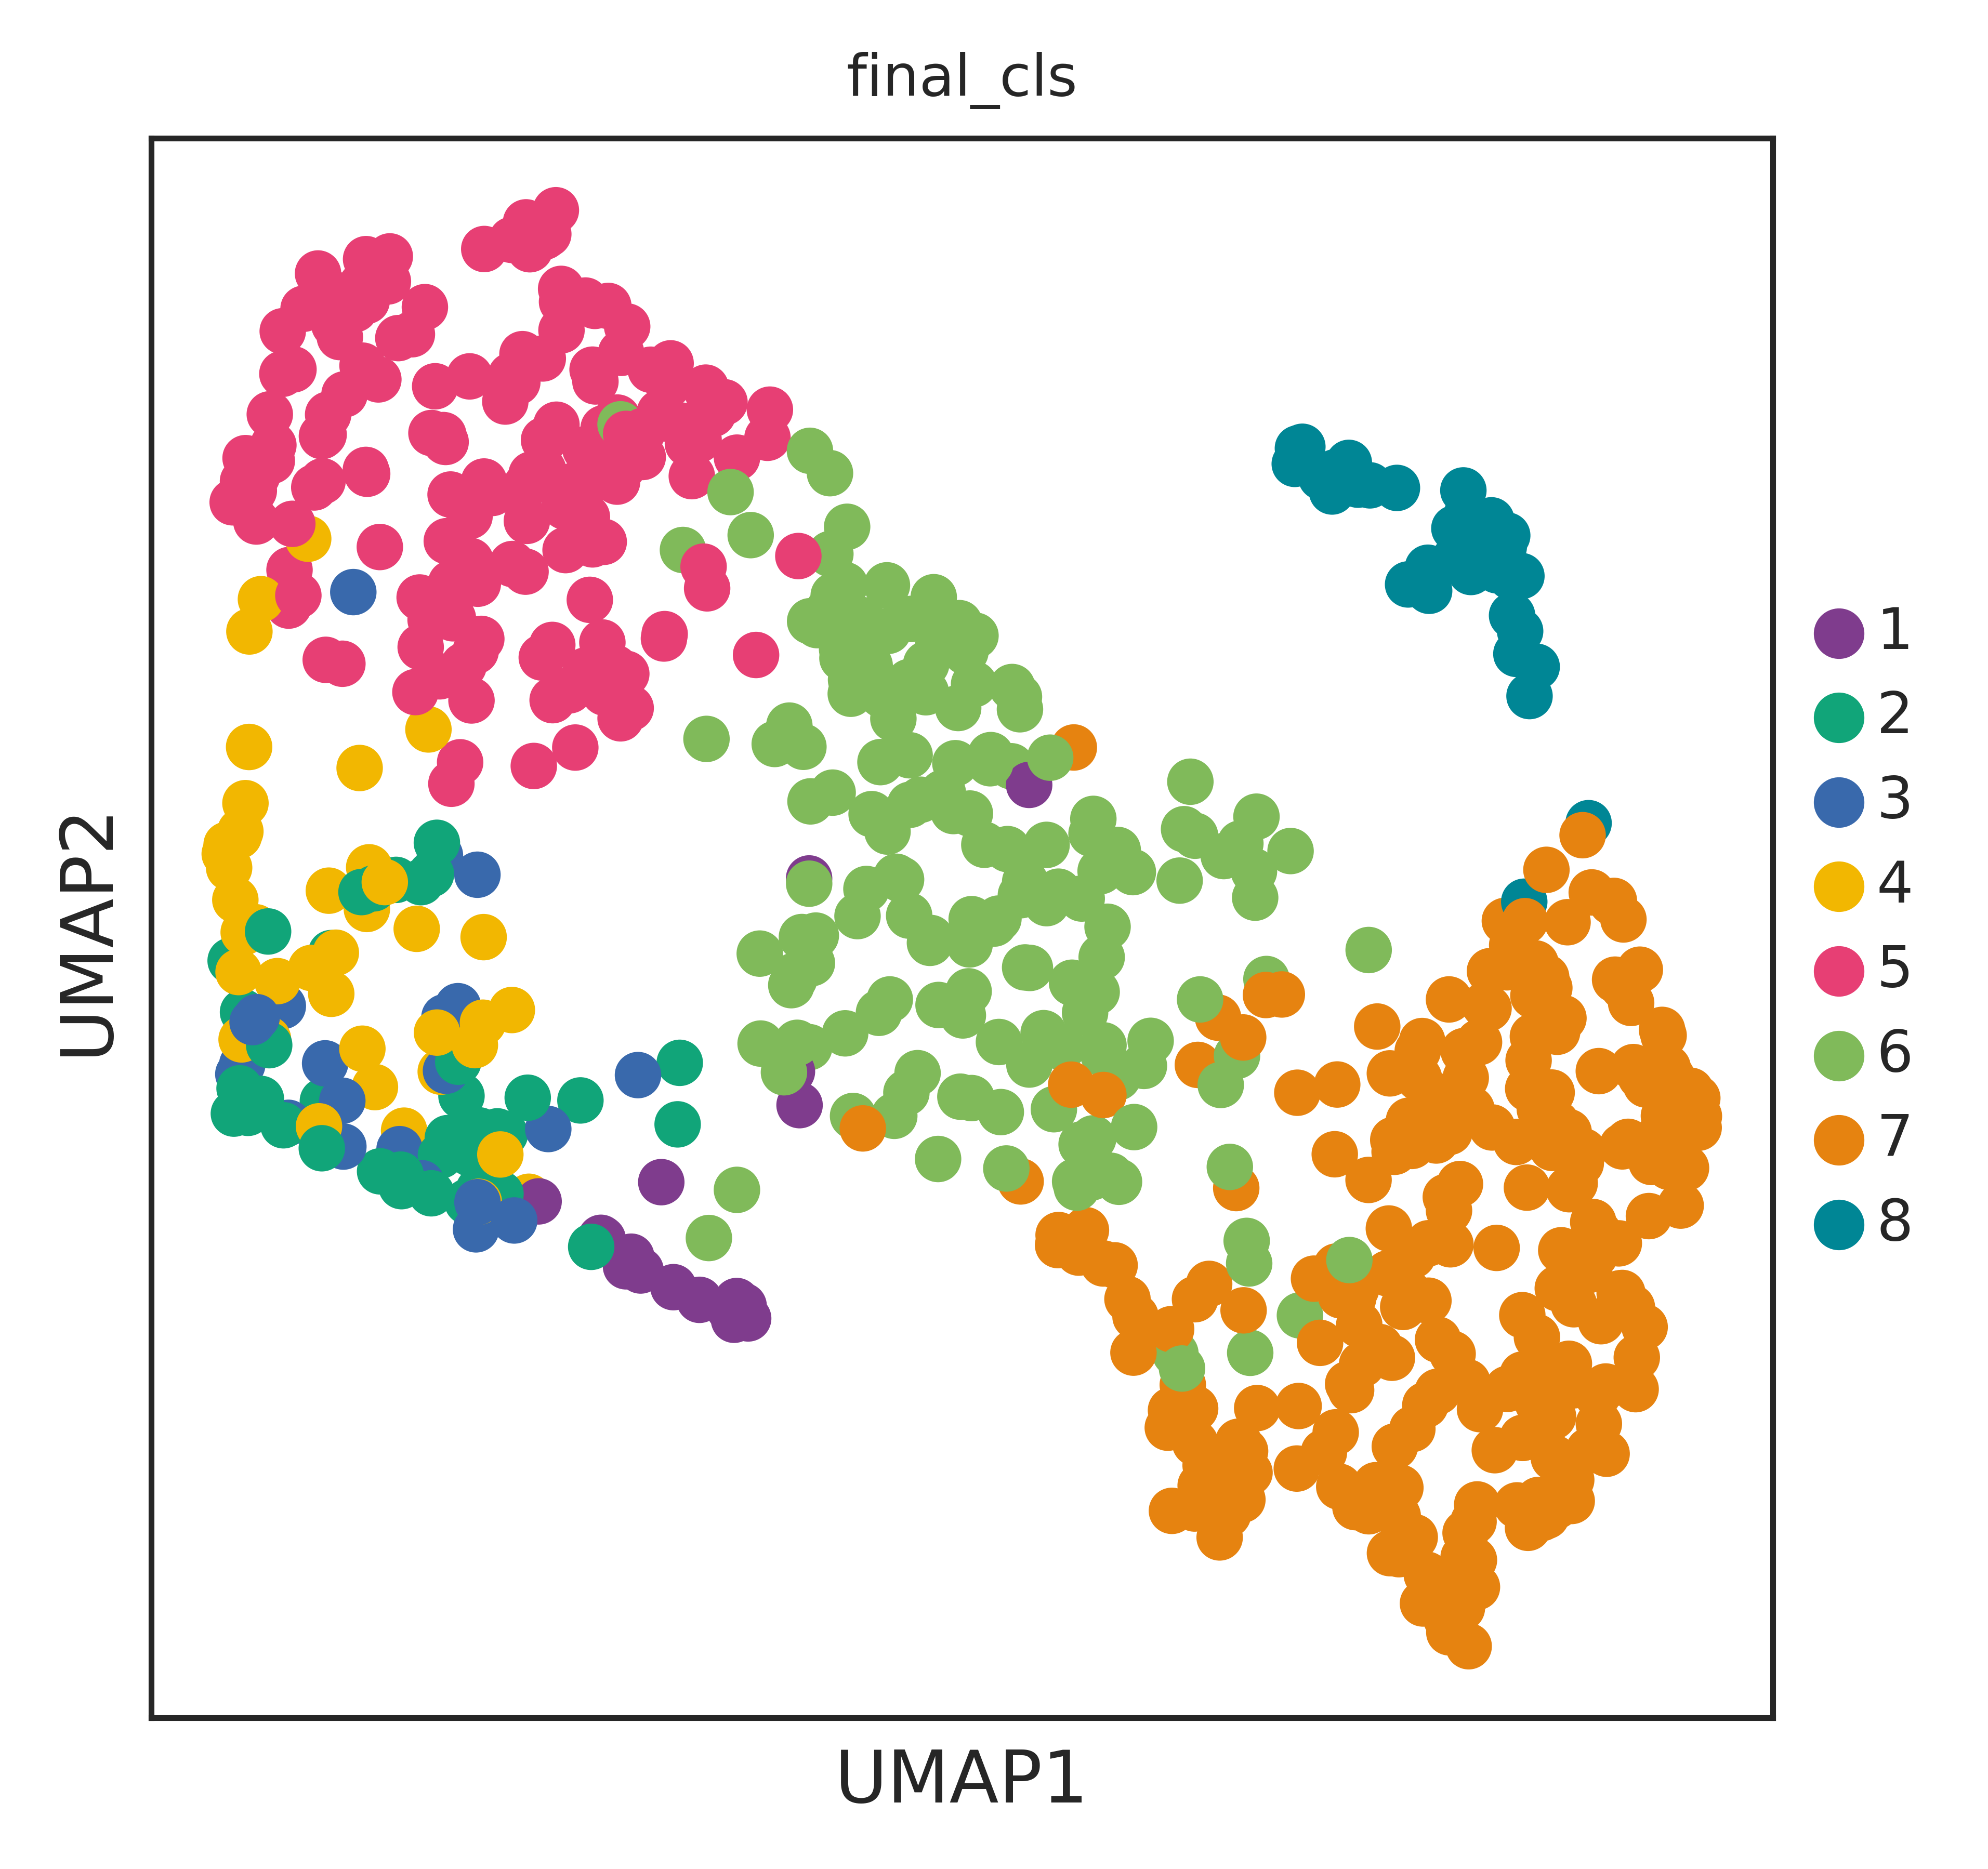

In [9]:
sc.pl.umap(a,color='final_cls',palette=cls_cmp)

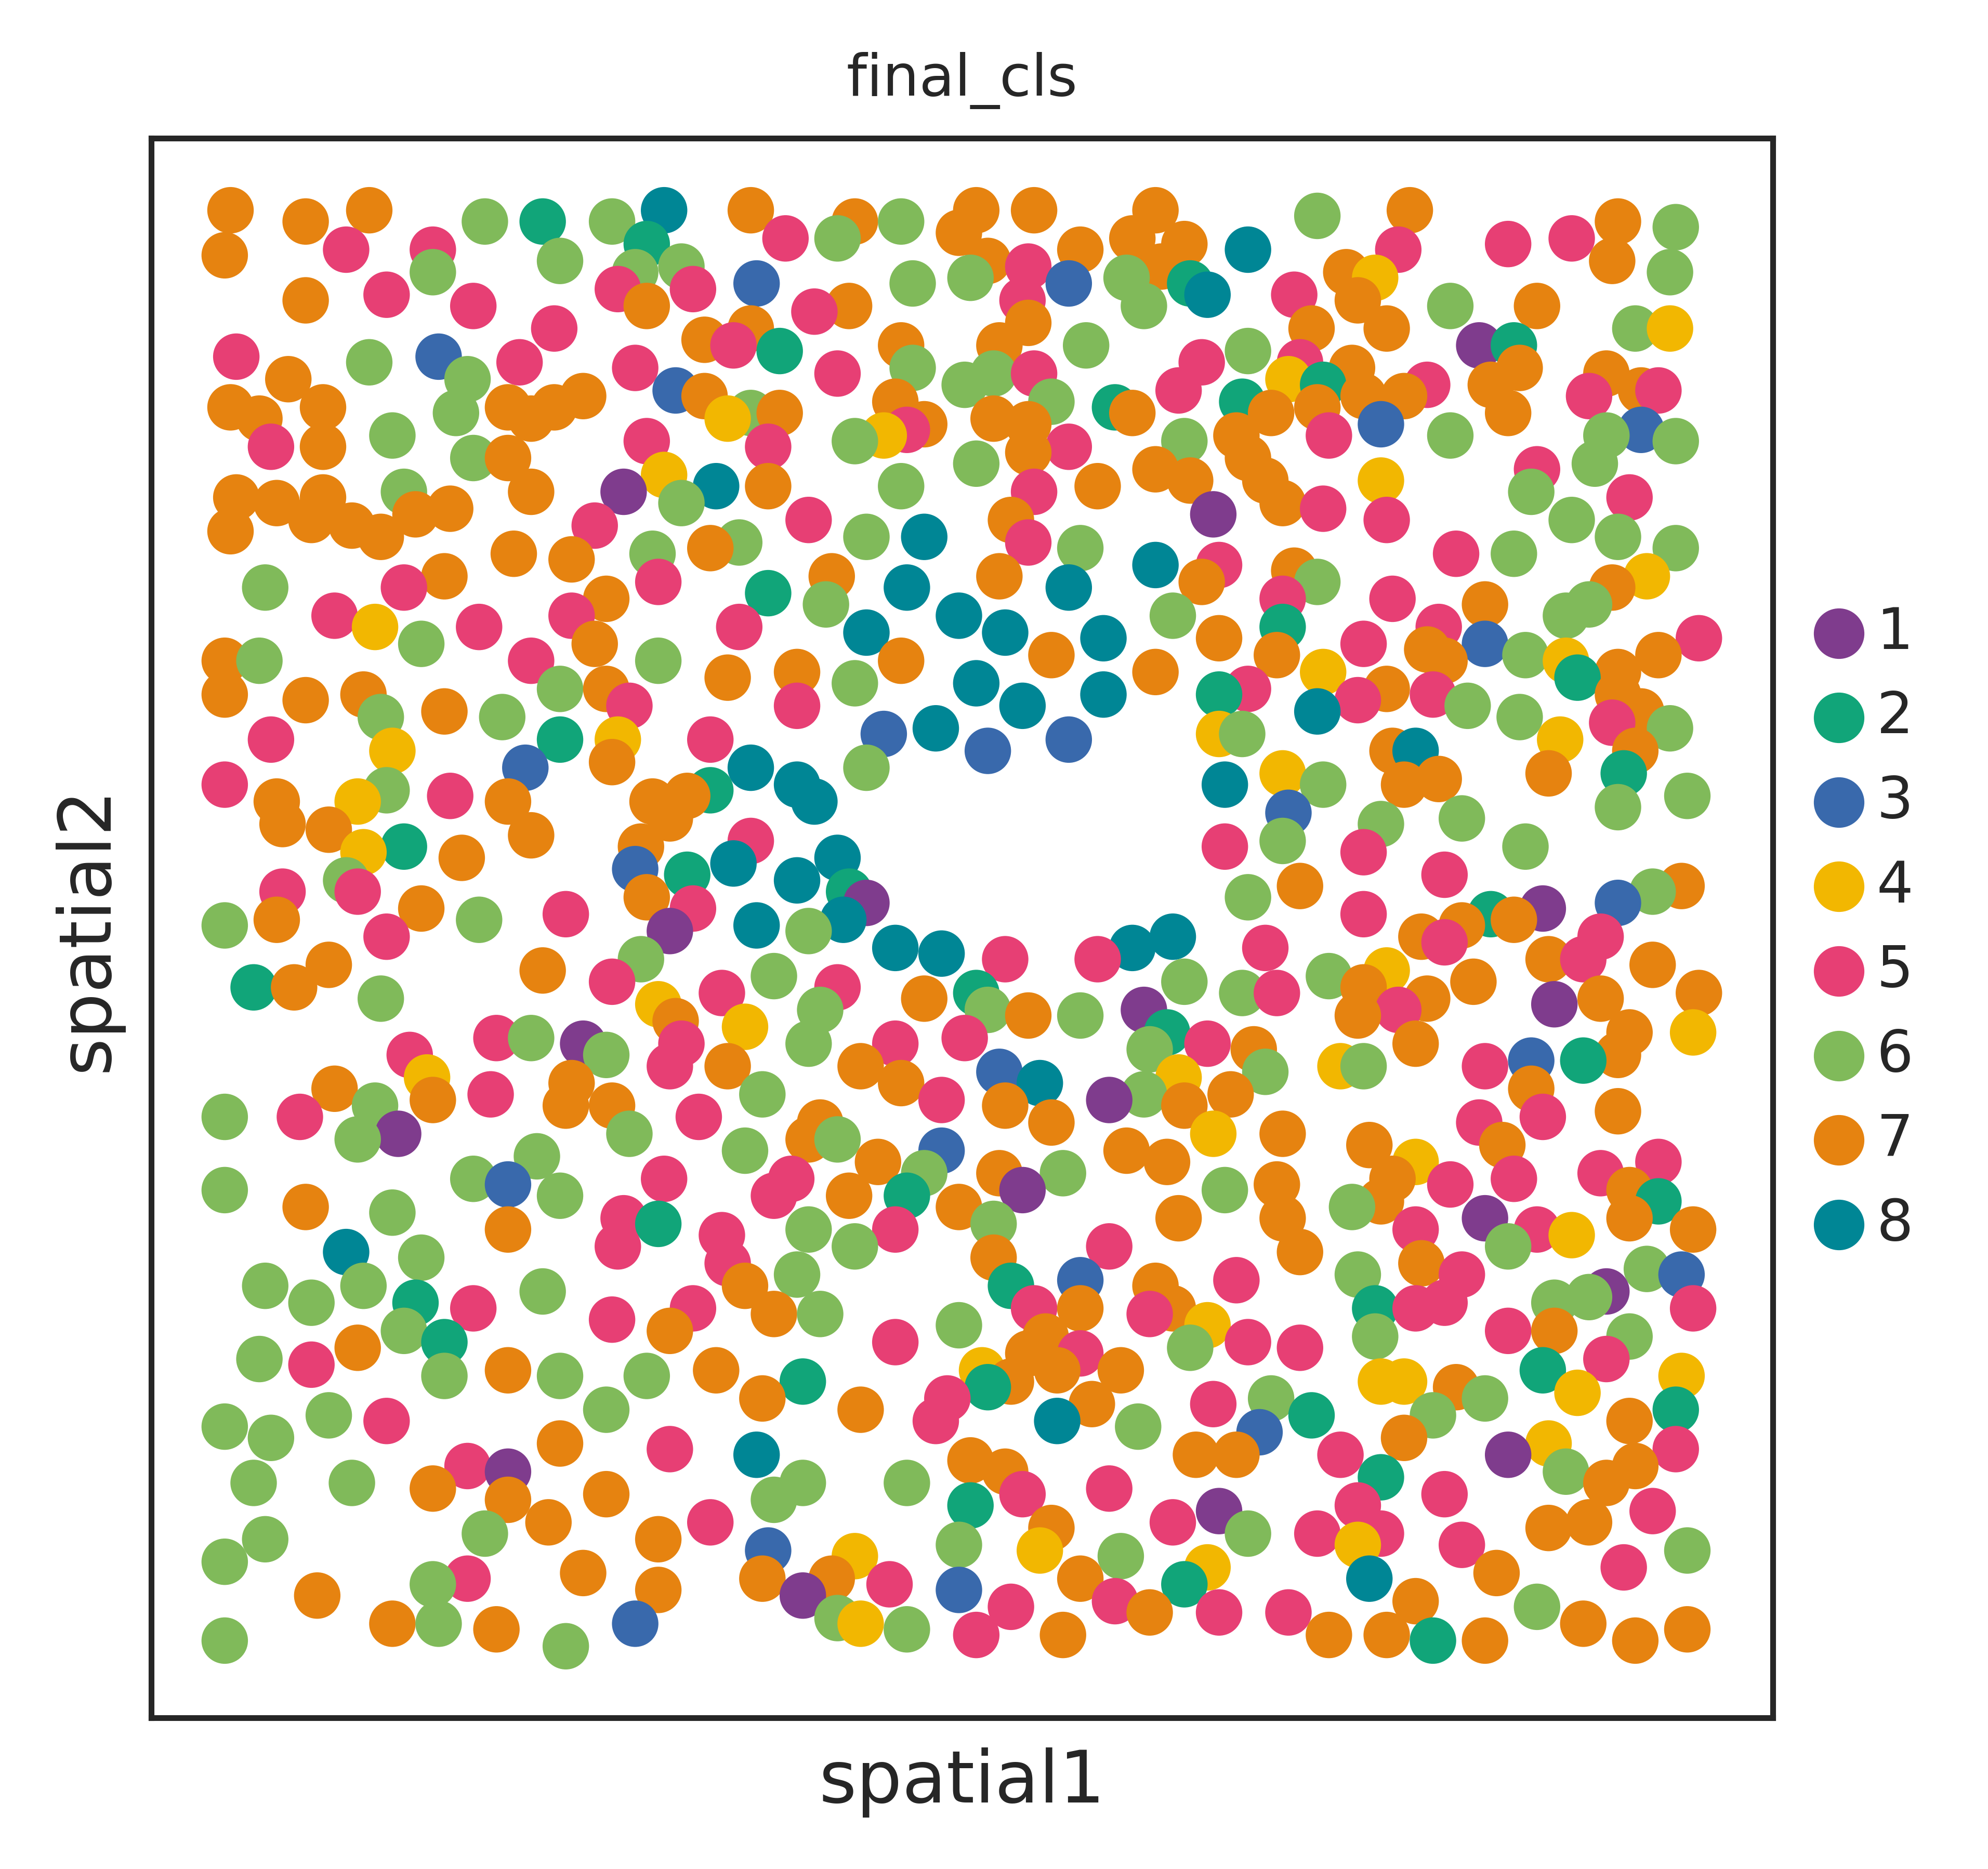

In [10]:
sc.pl.embedding(a,basis='spatial',color='final_cls')

compare mean pixel profiles of two groups

In [17]:
compare_A = ['5','6','7']
compare_B = ['8']
cls_array = np.array(a.obs['final_cls'])

In [65]:
def get_pixelProfile_from_clsID(cls_id_list,cls_array):
    cell_idx = np.where(np.isin(cls_array,cls_id_list))[0]
    pixel_profile_mat = np.array(a.X)[cell_idx,:]
    return pixel_profile_mat

In [36]:
def get_pixelProfile_from_clsID(cls_id_list,cls_array):
    interested_pixel_idx_list = []
    cell_idx = np.where(np.isin(cls_array,cls_id_list))[0]
    for ci in cell_idx:
    #     ci start from 0
        cur_cell_pixel = np.where(a_raw.uns['cell_idx']==ci+1)
        interested_pixel_idx_list.append(cur_cell_pixel)
    interested_pixel_idx_list = np.hstack(interested_pixel_idx_list)[0,:]
    pixel_profile_mat = a_raw.uns['IMS'][interested_pixel_idx_list,:]
    return pixel_profile_mat

In [66]:
pixel_mat_A = get_pixelProfile_from_clsID(compare_A,cls_array)
pixel_mat_B = get_pixelProfile_from_clsID(compare_B,cls_array)

In [67]:
diff_array = np.log(np.mean(pixel_mat_B,axis=0)/np.mean(pixel_mat_A,axis=0))

In [44]:
bar_x

array([ 50.27,  50.83,  51.29,  52.29,  53.29,  54.32,  55.3 ,  56.31,
        57.29,  58.3 ,  59.31,  60.26,  60.86,  61.28,  62.29,  63.27,
        63.88,  64.31,  65.31,  66.32,  67.34,  68.34,  69.32,  70.35,
        71.34,  72.34,  73.35,  74.33,  75.32,  76.29,  77.31,  78.32,
        79.29,  80.3 ,  81.33,  82.37,  83.37,  84.38,  85.38,  86.36,
        87.36,  88.36,  89.37,  90.36,  91.36,  92.39,  93.39,  94.39,
        95.38,  96.37,  97.36,  98.4 ,  99.41, 100.4 , 101.41, 102.35,
       103.36, 104.39, 105.38, 106.4 , 107.4 , 108.43, 109.43, 110.41,
       111.43, 112.38, 113.46, 114.44, 115.44, 116.43, 117.42, 118.43,
       119.41, 120.42, 121.42, 122.43, 123.43, 124.45, 125.47, 126.45,
       127.47, 128.39, 129.47, 130.46, 131.46, 132.46, 133.47, 134.48,
       135.46, 136.41, 137.43, 138.46, 139.47, 140.48, 141.5 , 142.47,
       143.43, 144.41, 145.45, 146.45, 147.47, 148.47, 149.45, 150.5 ,
       151.49, 152.49, 153.52, 154.53, 155.55, 156.53, 157.49, 158.46,
      

In [114]:
highlight_list = ['58.3','59.31','69.32','71.34','73.35','87.36','101.41']
highlight_idx_list = [np.where(np.array(a.var_names)==m)[0][0] for m in highlight_list]

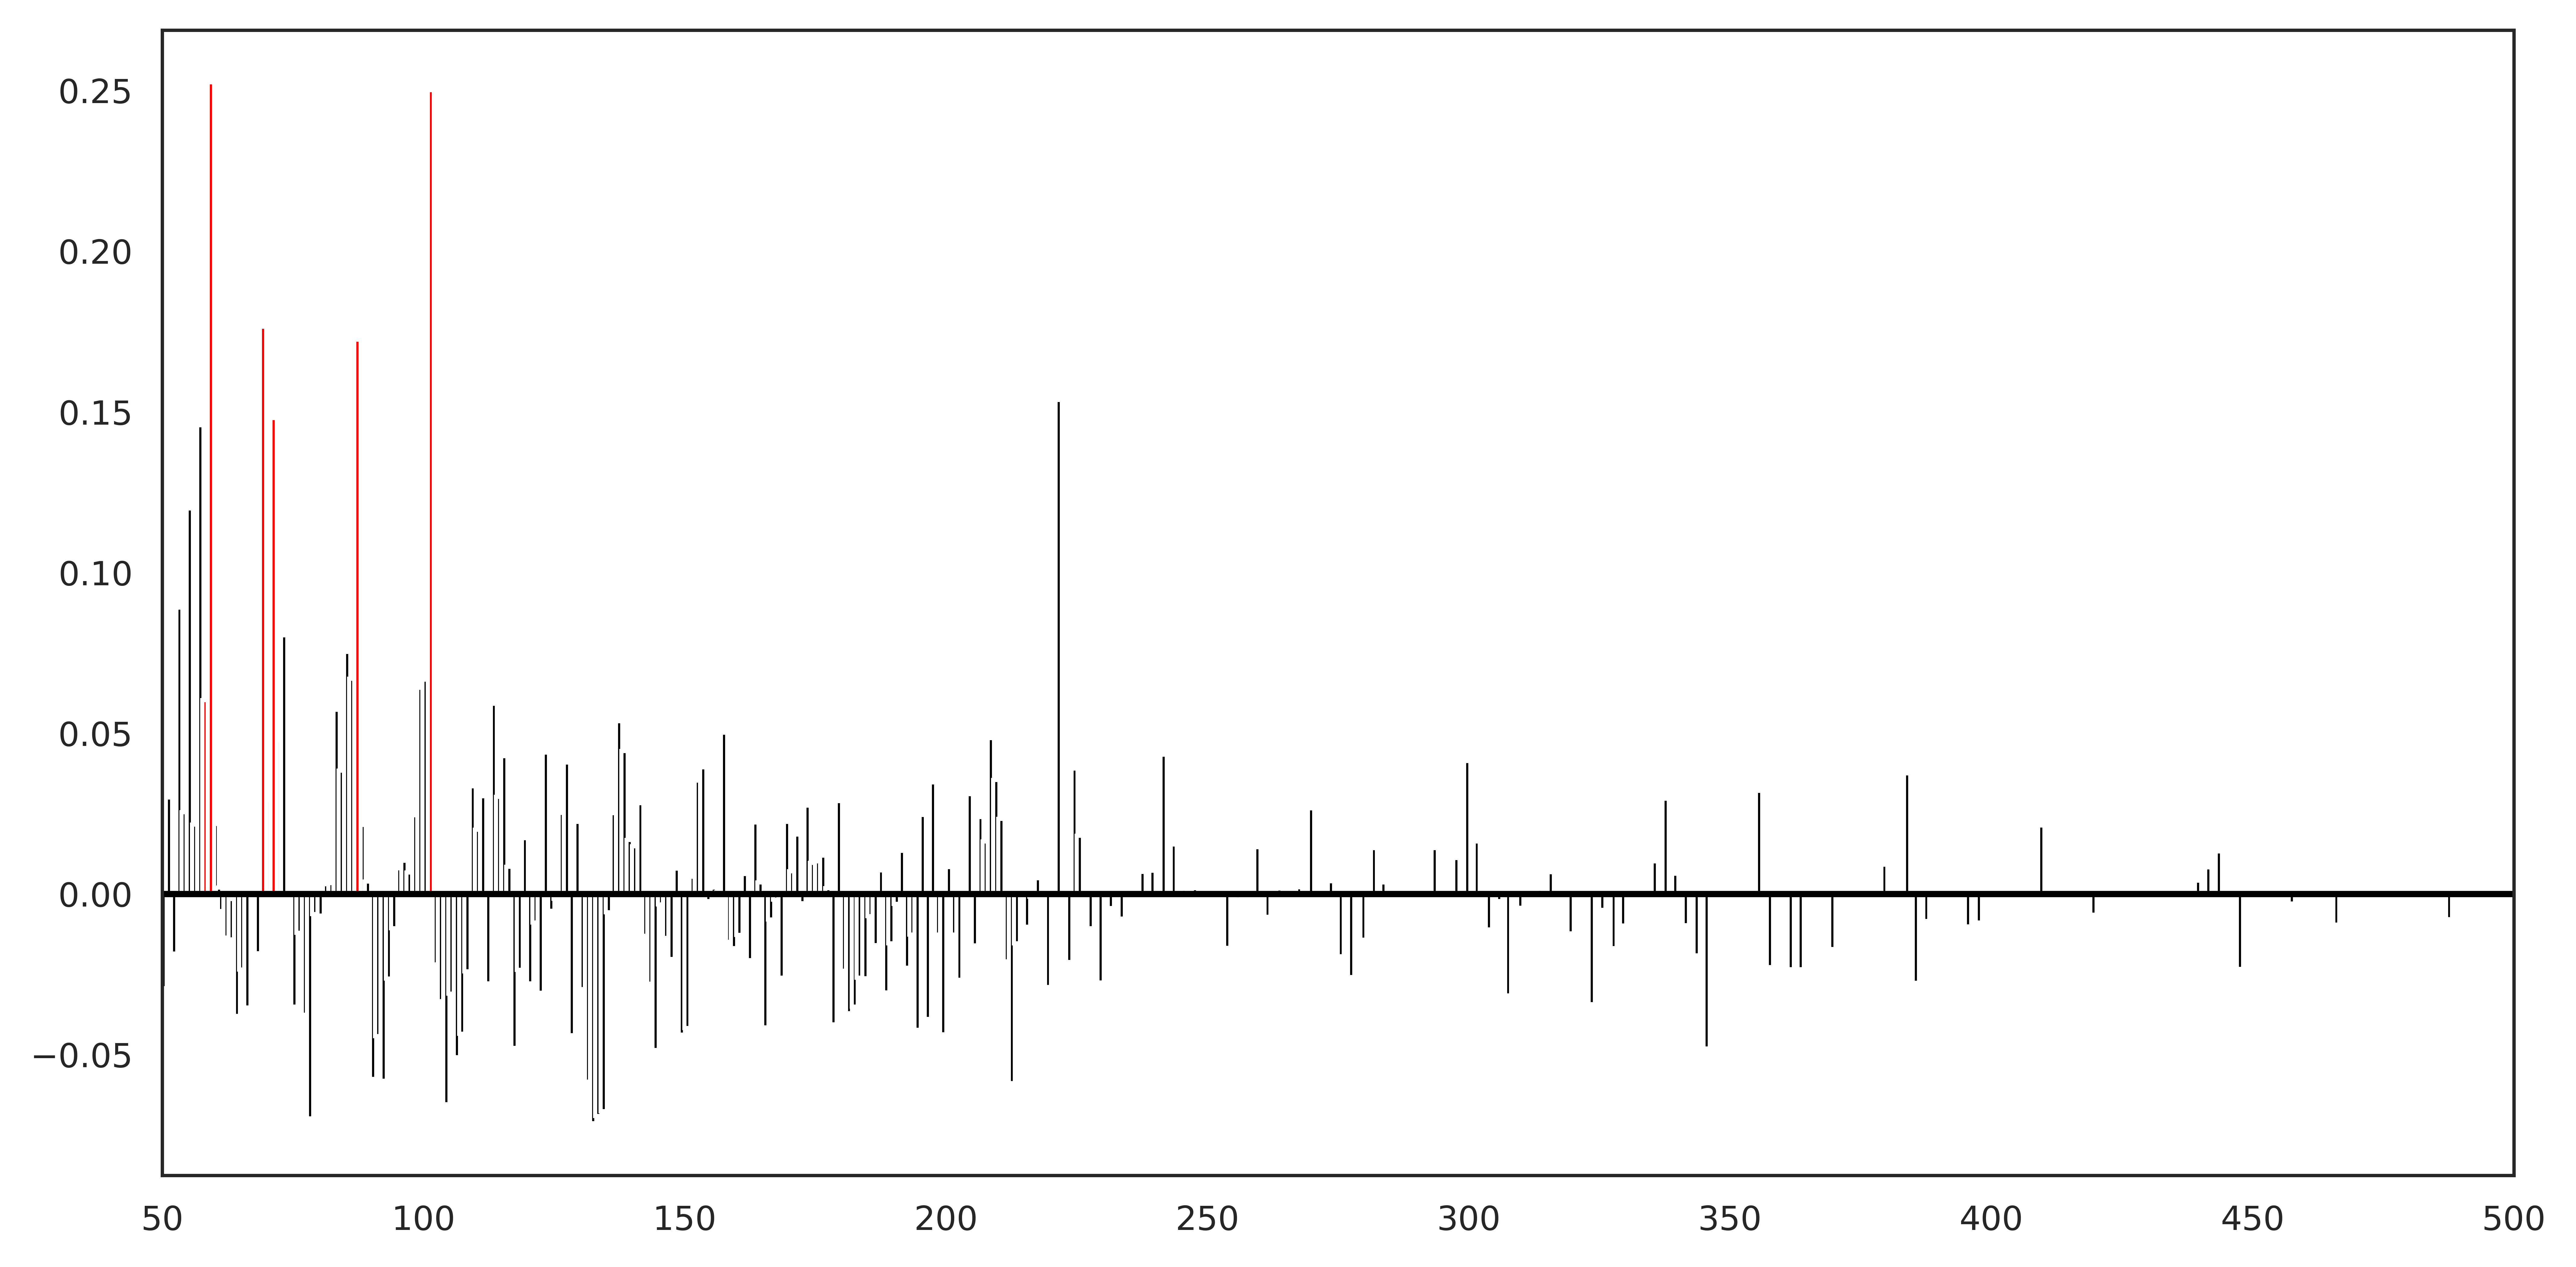

In [91]:
# for k in range(10,20):
bar_x = np.array(a.var_names).astype('float')
bar_y = diff_array
fig,ax = plt.subplots(figsize=(10,5))
barlist = ax.bar(bar_x,bar_y,width=1.2,color='k')
# for i in highlight_idx_list:
#     barlist[i].set_color('r')
#     barlist[i]
barlist = ax.bar(bar_x[highlight_idx_list],bar_y[highlight_idx_list],width=1.2,color='r')
ax.axhline(y=0, color='k', linestyle='-')
ax.set_xlim([50, 500])
plt.show()
# ax.set_ylim([-0.2, 0.3])

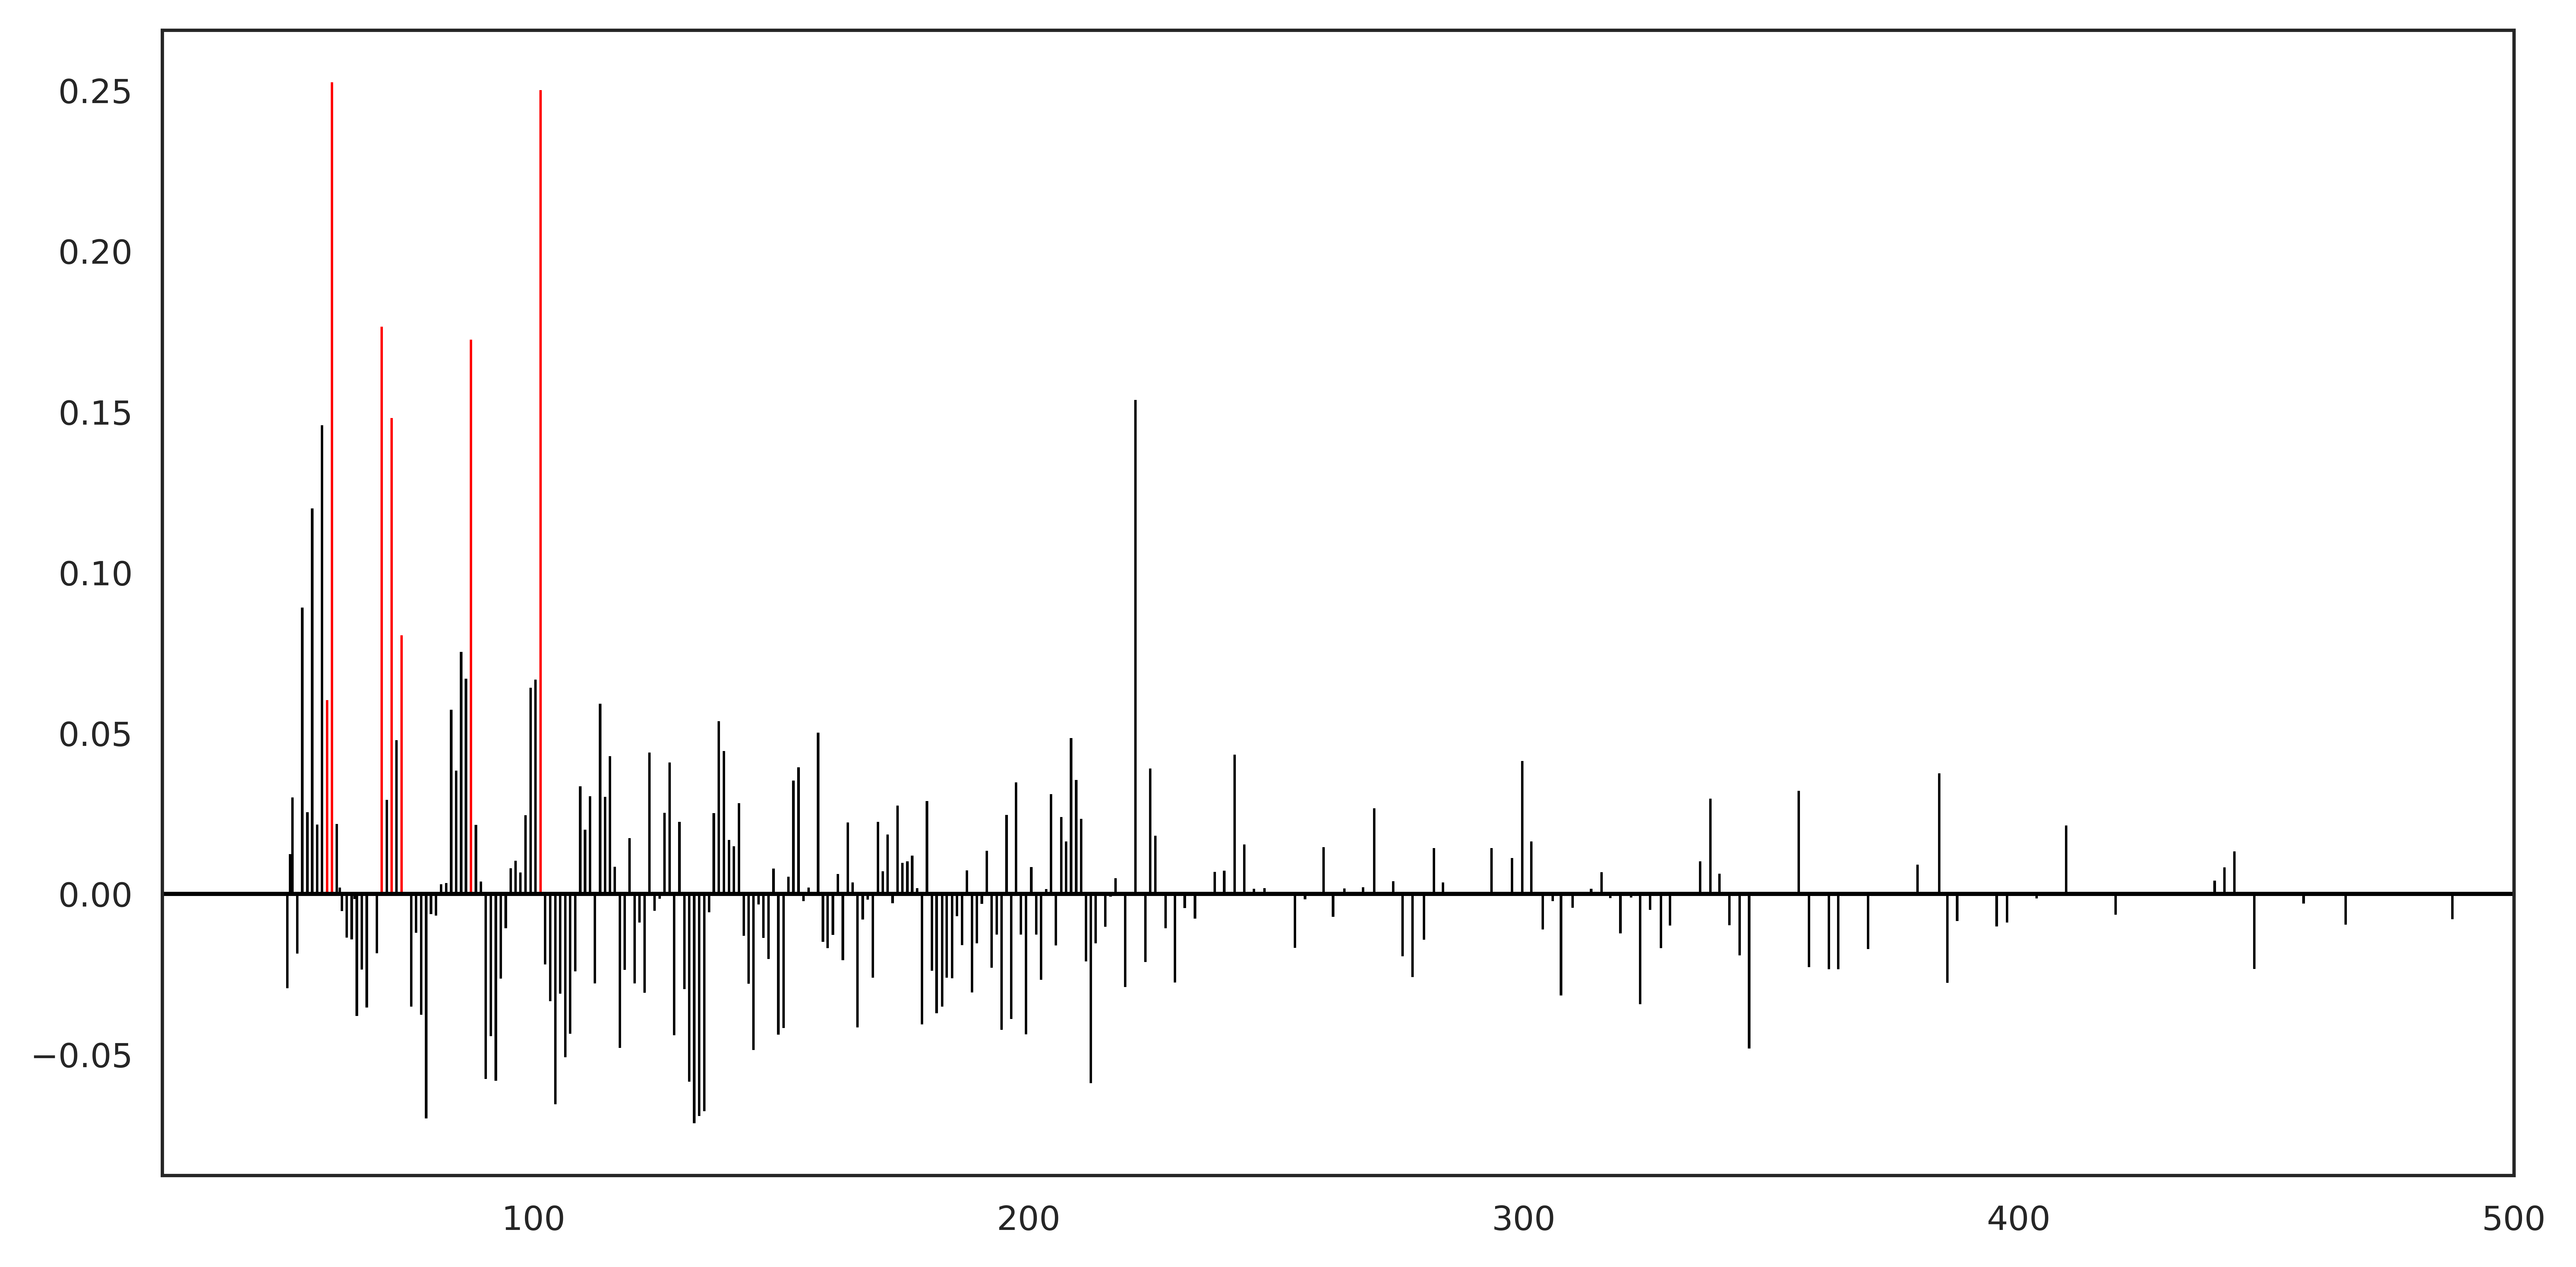

In [121]:
# for k in range(10,20):
bar_x = np.array(a.var_names).astype('float')
bar_y = diff_array
fig,ax = plt.subplots(figsize=(10,5))
barlist = ax.bar(bar_x,bar_y,width=0.5,color='k',linewidth=0)
# for i in highlight_idx_list:
#     barlist[i].set_color('r')
#     barlist[i]
barlist = ax.bar(bar_x[highlight_idx_list],bar_y[highlight_idx_list],width=0.5,color='r',linewidth=0)
ax.axhline(y=0, color='k', linestyle='-',linewidth=1)
ax.set_xlim([25, 500])
plt.show()
# ax.set_ylim([-0.2, 0.3])

11.23

In [126]:
init = 3.4
for i in range(15):
    init+=0.26
    init = np.round(init,2)
    print(init)

3.66
3.92
4.18
4.44
4.7
4.96
5.22
5.48
5.74
6.0
6.26
6.52
6.78
7.04
7.3


0.2599999999999998